# Importing necessary labrary

In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
pd.options.display.float_format='{:.2f}'.format
pd.options.display.max_columns=None
sns.set_theme(color_codes=True)

In [427]:
#from google.colab import files
#uploaded=files.upload()

In [428]:
#import io

In [429]:
#df=pd.read_csv(io.bytesIO(uploaded['Train-Set.csv']))


# Read Data Set 


In [430]:
df=pd.read_csv(r'/content/drive/MyDrive/Data sets/Big Mart Sales/Train-Set.csv')
df.head(2)

ProductID  Weight FatContent  ProductVisibility  ProductType    MRP  \
0     FDA15    9.30    Low Fat               0.02        Dairy 249.81   
1     DRC01    5.92    Regular               0.02  Soft Drinks  48.27   

  OutletID  EstablishmentYear OutletSize LocationType         OutletType  \
0   OUT049               1999     Medium       Tier 1  Supermarket Type1   
1   OUT018               2009     Medium       Tier 3  Supermarket Type2   

   OutletSales  
0      3735.14  
1       443.42

# Data Preprocessing/Understanding Part

In [431]:
df.shape

(8523, 12)

In [432]:
df.isna().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [433]:
# what missing percentage value in  
miss=(df.isna().sum()/df.shape[0])*100
miss=miss.reset_index()
miss=miss.rename(columns={'index':'Column_Name',0:'%Miss Percentage'})
miss


Column_Name  %Miss Percentage
0           ProductID              0.00
1              Weight             17.17
2          FatContent              0.00
3   ProductVisibility              0.00
4         ProductType              0.00
5                 MRP              0.00
6            OutletID              0.00
7   EstablishmentYear              0.00
8          OutletSize             28.28
9        LocationType              0.00
10         OutletType              0.00
11        OutletSales              0.00

In [434]:
df.fillna(df['Weight'].mode()[0],inplace=True)
df.fillna(df['OutletSize'].mode()[0],inplace=True)

In [435]:
df.select_dtypes(include='object').nunique()

ProductID       1559
FatContent         5
ProductType       16
OutletID          10
OutletSize         4
LocationType       3
OutletType         4
dtype: int64

In [436]:
df.nunique()

ProductID            1559
Weight                415
FatContent              5
ProductVisibility    7880
ProductType            16
MRP                  5938
OutletID               10
EstablishmentYear       9
OutletSize              4
LocationType            3
OutletType              4
OutletSales          3493
dtype: int64

In [437]:
def unique_val(df):
  cat=df.select_dtypes(include="object").nunique().sort_values(ascending = False).index
  ndf=pd.DataFrame()
  for i in cat:
    ndf[f'{i}']=pd.Series(df[f'{i}'].unique())
  ndf.replace(np.nan,"",inplace=True)
  return ndf.T

In [438]:
unique_val(df)

0                  1              2     \
ProductID                 FDA15              DRC01          FDN15   
ProductType               Dairy        Soft Drinks           Meat   
OutletID                 OUT049             OUT018         OUT010   
FatContent              Low Fat            Regular        low fat   
OutletSize               Medium              12.15           High   
OutletType    Supermarket Type1  Supermarket Type2  Grocery Store   
LocationType             Tier 1             Tier 3         Tier 2   

                               3          4             5            6     \
ProductID                     FDX07      NCD19         FDP36        FDO10   
ProductType   Fruits and Vegetables  Household  Baking Goods  Snack Foods   
OutletID                     OUT013     OUT027        OUT045       OUT017   
FatContent                       LF        reg                              
OutletSize                    Small                                         
OutletType        Supermarket Type3                                         
LocationType                                                                

                      7          8                   9            10    \
ProductID            FDP10      FDH17               FDU28        FDY07   
ProductType   Frozen Foods  Breakfast  Health and Hygiene  Hard Drinks   
OutletID            OUT046     OUT035              OUT019                
FatContent                                                               
OutletSize                                                               
OutletType                                                               
LocationType                                                             

                11      12             13      14       15     16     17    \
ProductID      FDA03   FDX32          FDS46   FDF32    FDP49  NCB42  DRI11   
ProductType   Canned  Breads  Starchy Foods  Others  Seafood                 
OutletID                                                                     
FatContent                                                                   
OutletSize                                                                   
OutletType                                                                   
LocationType                                                                 

               18     19     20     21     22     23     24     25     26    \
ProductID     FDU02  FDN22  FDW12  NCB30  FDC37  FDR28  NCD06  FDV10  DRJ59   
ProductType                                                                   
OutletID                                                                      
FatContent                                                                    
OutletSize                                                                    
OutletType                                                                    
LocationType                                                                  

               27     28     29     30     31     32     33     34     35    \
ProductID     FDE51  FDC14  FDV38  NCS17  FDP33  FDO23  DRH01  NCX29  FDV20   
ProductType                                                                   
OutletID                                                                      
FatContent                                                                    
OutletSize                                                                    
OutletType                                                                    
LocationType                                                                  

               36     37     38     39     40     41     42     43     44    \
ProductID     DRZ11  FDX10  FDB34  FDK43  FDA46  FDC02  FDL50  FDM39  NCP05   
ProductType                                                                   
OutletID                                                                      
FatContent                                               

In [439]:
df.describe(include='object').T

count unique                    top  freq
ProductID     8523   1559                  FDW13    10
FatContent    8523      5                Low Fat  5089
ProductType   8523     16  Fruits and Vegetables  1232
OutletID      8523     10                 OUT027   935
OutletSize    8523      4                 Medium  2793
LocationType  8523      3                 Tier 3  3350
OutletType    8523      4      Supermarket Type1  5577

In [440]:
df.describe(exclude='object').T

count    mean     std     min     25%     50%     75%  \
Weight            8523.00   12.74    4.23    4.55    9.31   12.15   16.00   
ProductVisibility 8523.00    0.07    0.05    0.00    0.03    0.05    0.09   
MRP               8523.00  140.99   62.28   31.29   93.83  143.01  185.64   
EstablishmentYear 8523.00 1997.83    8.37 1985.00 1987.00 1999.00 2004.00   
OutletSales       8523.00 2181.29 1706.50   33.29  834.25 1794.33 3101.30   

                       max  
Weight               21.35  
ProductVisibility     0.33  
MRP                 266.89  
EstablishmentYear  2009.00  
OutletSales       13086.96

In [441]:
#df.dropna(thresh=df.shape[1]-df.shape[1]*0.01)

### Creating MRP RANGE

In [442]:
bins=np.arange(0,round(df['MRP'].max()+50),50)
range=['0-50', '50-100', '100-150', '150-200', '200-250','250 And above']
df['MRP_RANGE']=pd.cut(df['MRP'],bins,labels=range)

In [443]:
df.head(2)

ProductID  Weight FatContent  ProductVisibility  ProductType    MRP  \
0     FDA15    9.30    Low Fat               0.02        Dairy 249.81   
1     DRC01    5.92    Regular               0.02  Soft Drinks  48.27   

  OutletID  EstablishmentYear OutletSize LocationType         OutletType  \
0   OUT049               1999     Medium       Tier 1  Supermarket Type1   
1   OUT018               2009     Medium       Tier 3  Supermarket Type2   

   OutletSales MRP_RANGE  
0      3735.14   200-250  
1       443.42      0-50

### Creating OutletSales range

In [444]:
bins=np.arange(0,round(df['OutletSales'].max()+3000),3000)
range=['0-3000','3000-6000','6000-9000','9000-12000','12000 And above']
df['OutletSales_range']=pd.cut(df['OutletSales'],bins,labels=range)
df.head(2)

ProductID  Weight FatContent  ProductVisibility  ProductType    MRP  \
0     FDA15    9.30    Low Fat               0.02        Dairy 249.81   
1     DRC01    5.92    Regular               0.02  Soft Drinks  48.27   

  OutletID  EstablishmentYear OutletSize LocationType         OutletType  \
0   OUT049               1999     Medium       Tier 1  Supermarket Type1   
1   OUT018               2009     Medium       Tier 3  Supermarket Type2   

   OutletSales MRP_RANGE OutletSales_range  
0      3735.14   200-250         3000-6000  
1       443.42      0-50            0-3000

In [490]:
df.groupby('ProductID').agg({'MRP':('sum','mean')})

MRP       
              sum   mean
ProductID               
DRA12      851.19 141.87
DRA24     1148.61 164.09
DRA59     1481.44 185.18
DRB01      568.76 189.59
DRB13      948.46 189.69
...           ...    ...
NCZ30      845.27 120.75
NCZ41      628.15 125.63
NCZ42     1183.22 236.64
NCZ53      941.61 188.32
NCZ54     1135.79 162.26

[1559 rows x 2 columns]

# Outliers checking

In [445]:
cols=list(df.describe(include=[np.number]).T.index)
Outlier={}
cols
#df.info()

['Weight', 'ProductVisibility', 'MRP', 'EstablishmentYear', 'OutletSales']

In [446]:
for col in cols:
  q1,q3=np.percentile(df[col],q=(25,75))
  iqr=q3-q1
  lx=q1-1.5*iqr
  ux=q3+1.5*iqr
  outlier_count= len(df[(df[col]<lx) | (df[col]>ux)])
  #ndf=df[(df[col]>=lx) & (df[col]<=ux)]
  print(f"{col}: q1={round(q1,2)} - q3={round(q3,2)} - iqr={round(iqr,2)} - lx={round(lx,2)} - ux={round(ux,2)}")
  lx,ux=0,0
  if outlier_count>0:
    Outlier[col]=outlier_count


Weight: q1=9.31 - q3=16.0 - iqr=6.69 - lx=-0.72 - ux=26.04
ProductVisibility: q1=0.03 - q3=0.09 - iqr=0.07 - lx=-0.07 - ux=0.2
MRP: q1=93.83 - q3=185.64 - iqr=91.82 - lx=-43.9 - ux=323.37
EstablishmentYear: q1=1987.0 - q3=2004.0 - iqr=17.0 - lx=1961.5 - ux=2029.5
OutletSales: q1=834.25 - q3=3101.3 - iqr=2267.05 - lx=-2566.33 - ux=6501.87


In [447]:
if len(Outlier)==0:
  print("No outliers found")
else:
  for col,counts in Outlier.items():
    print(f"Column '{col}' has {counts} outliers")

Column 'ProductVisibility' has 144 outliers
Column 'OutletSales' has 186 outliers


In [448]:
Cat_Var=list(df.select_dtypes(include='object').nunique().index)

In [449]:
Cat_Var.pop(0)


'ProductID'

In [450]:
num_cols=cols
num_cols.pop(3)

'EstablishmentYear'

In [451]:
df.select_dtypes(include='object').value_counts()

ProductID  FatContent  ProductType            OutletID  OutletSize  LocationType  OutletType       
DRA12      LF          Soft Drinks            OUT035    Small       Tier 2        Supermarket Type1    1
FDV28      Regular     Frozen Foods           OUT010    12.15       Tier 3        Grocery Store        1
FDV32      Low Fat     Fruits and Vegetables  OUT035    Small       Tier 2        Supermarket Type1    1
                                              OUT019    Small       Tier 1        Grocery Store        1
                                              OUT018    Medium      Tier 3        Supermarket Type2    1
                                                                                                      ..
FDJ22      Low Fat     Snack Foods            OUT045    12.15       Tier 2        Supermarket Type1    1
                                              OUT035    Small       Tier 2        Supermarket Type1    1
                                              OUT027    Medi

In [452]:
df.duplicated().sum()

0

# Correlation Heatmap

<ipython-input-453-6d187507fce1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),fmt=".2g",annot=True)


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'Weight'),
  Text(1.5, 0, 'ProductVisibility'),
  Text(2.5, 0, 'MRP'),
  Text(3.5, 0, 'EstablishmentYear'),
  Text(4.5, 0, 'OutletSales')])

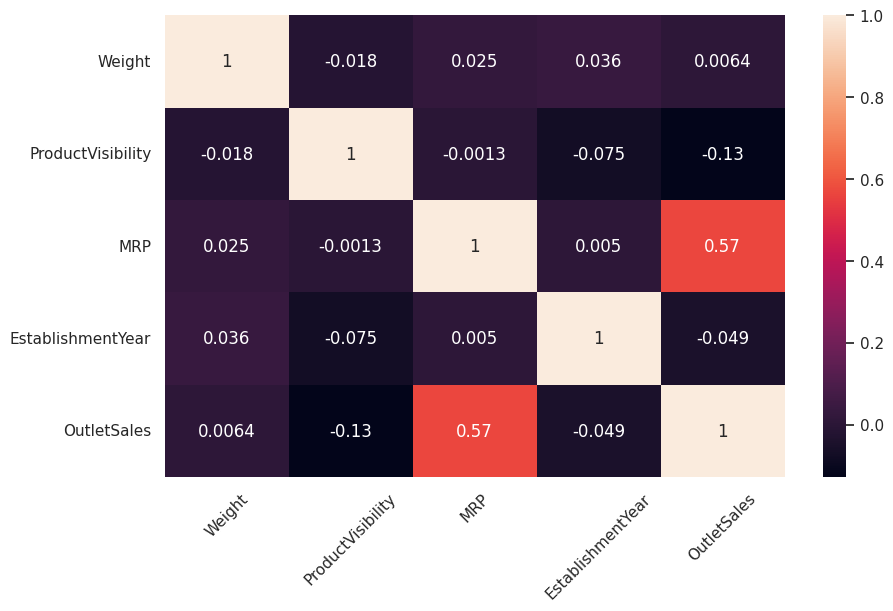

In [453]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),fmt=".2g",annot=True)
plt.yticks(rotation=0)
plt.xticks(rotation=45)

# Exploratory data Analysis

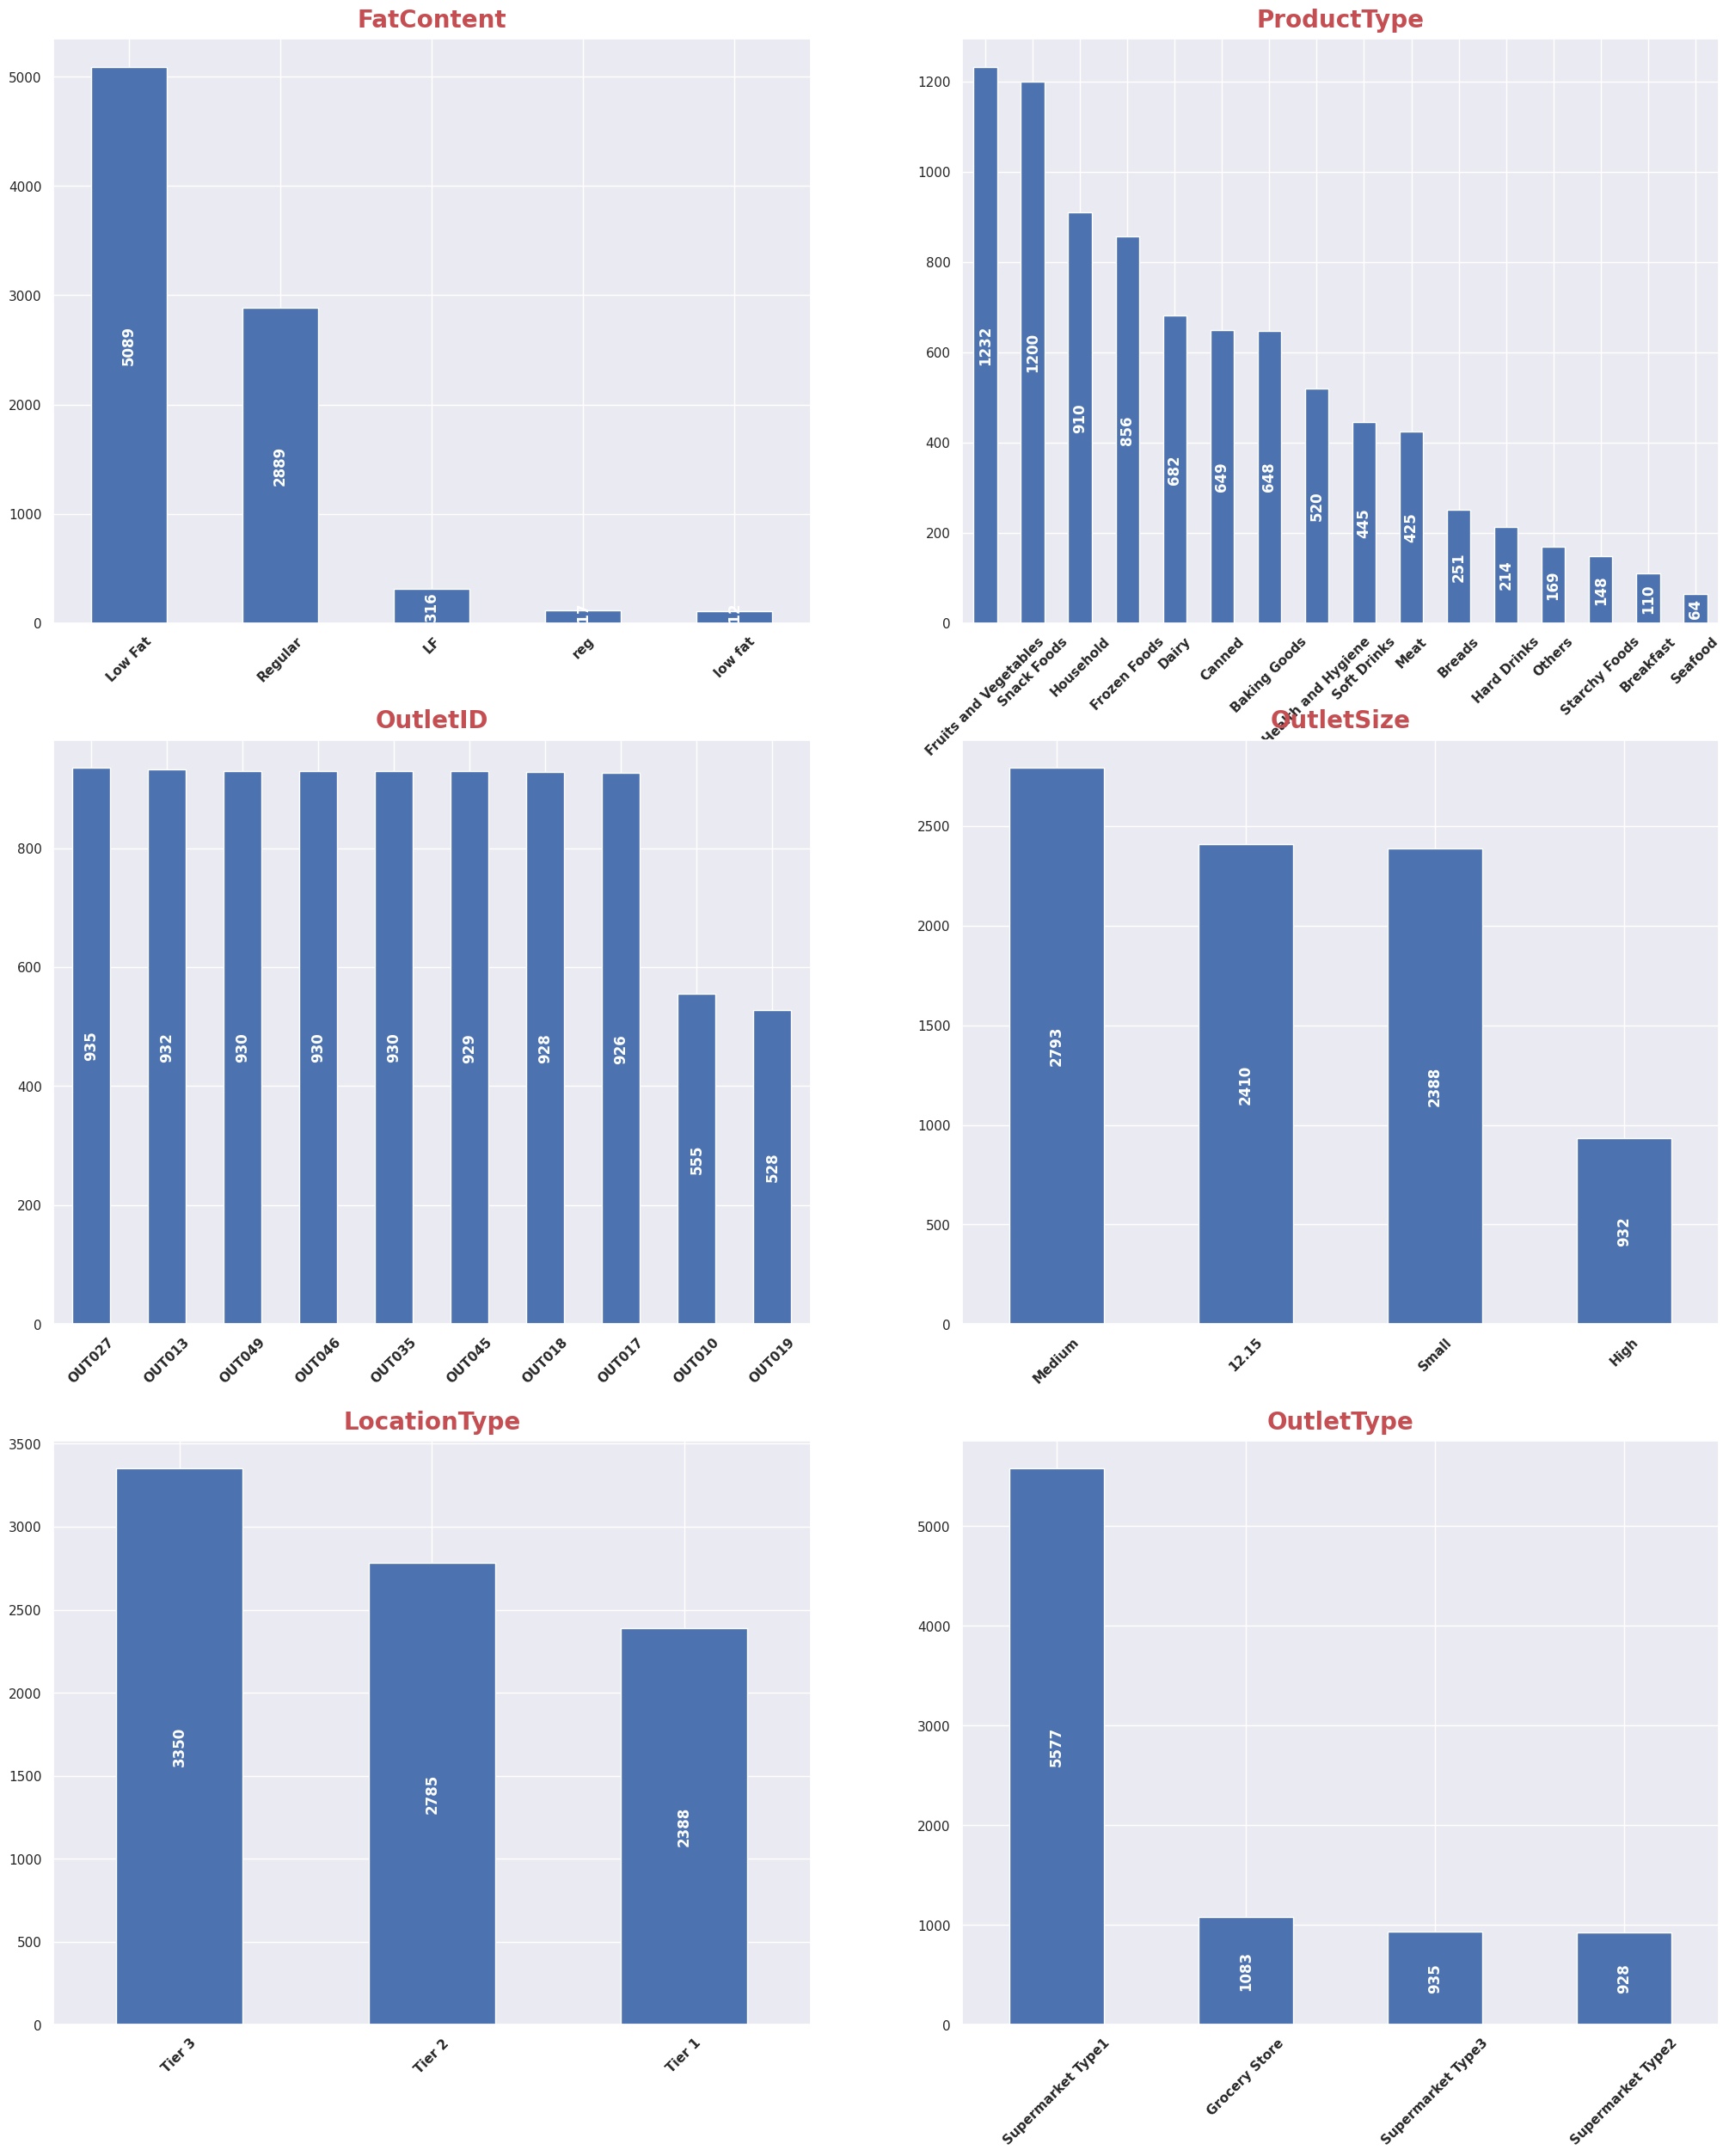

In [454]:
cat_var_b=Cat_Var#['Age_Range', 'Charges-Range']
fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(25,30))
axs=axs.flatten()
for i,var in enumerate(cat_var_b):
  #plt.title(f"{var} wise distribution",loc='center',pad=10)
  ax=df[f'{var}'].value_counts().plot(kind='bar',ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),fontweight='bold',rotation=45)
  axs[i].set_title(f"{var}",pad=10,fontweight='bold',fontsize=20,color='r')
  for container in ax.containers:
    container.datavalues
    ax.bar_label(container,color='white',rotation=90,label_type='center',fontweight='bold')

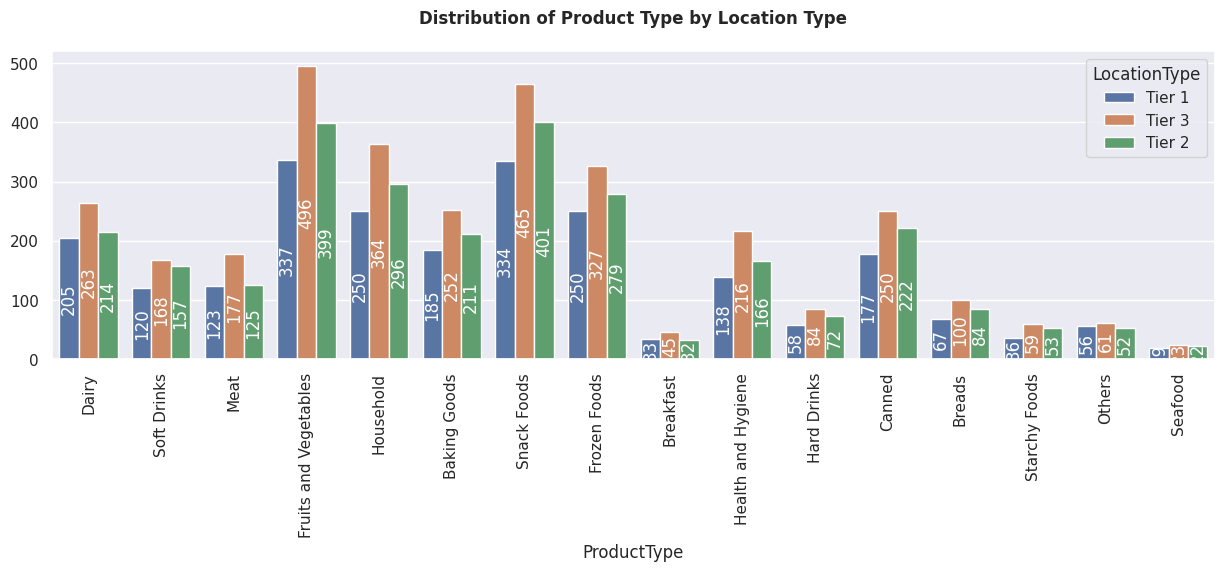

In [482]:
plt.figure(figsize=(15,4))
ax=sns.countplot(data=df,x=df['ProductType'],hue='LocationType')
plt.xticks(rotation=90)
plt.title("Distribution of Product Type by Location Type",weight='bold', pad=20)
plt.ylabel("")
for container in ax.containers:
    container.datavalues
    ax.bar_label(container,color='white',rotation=90,label_type='center')
plt.show()

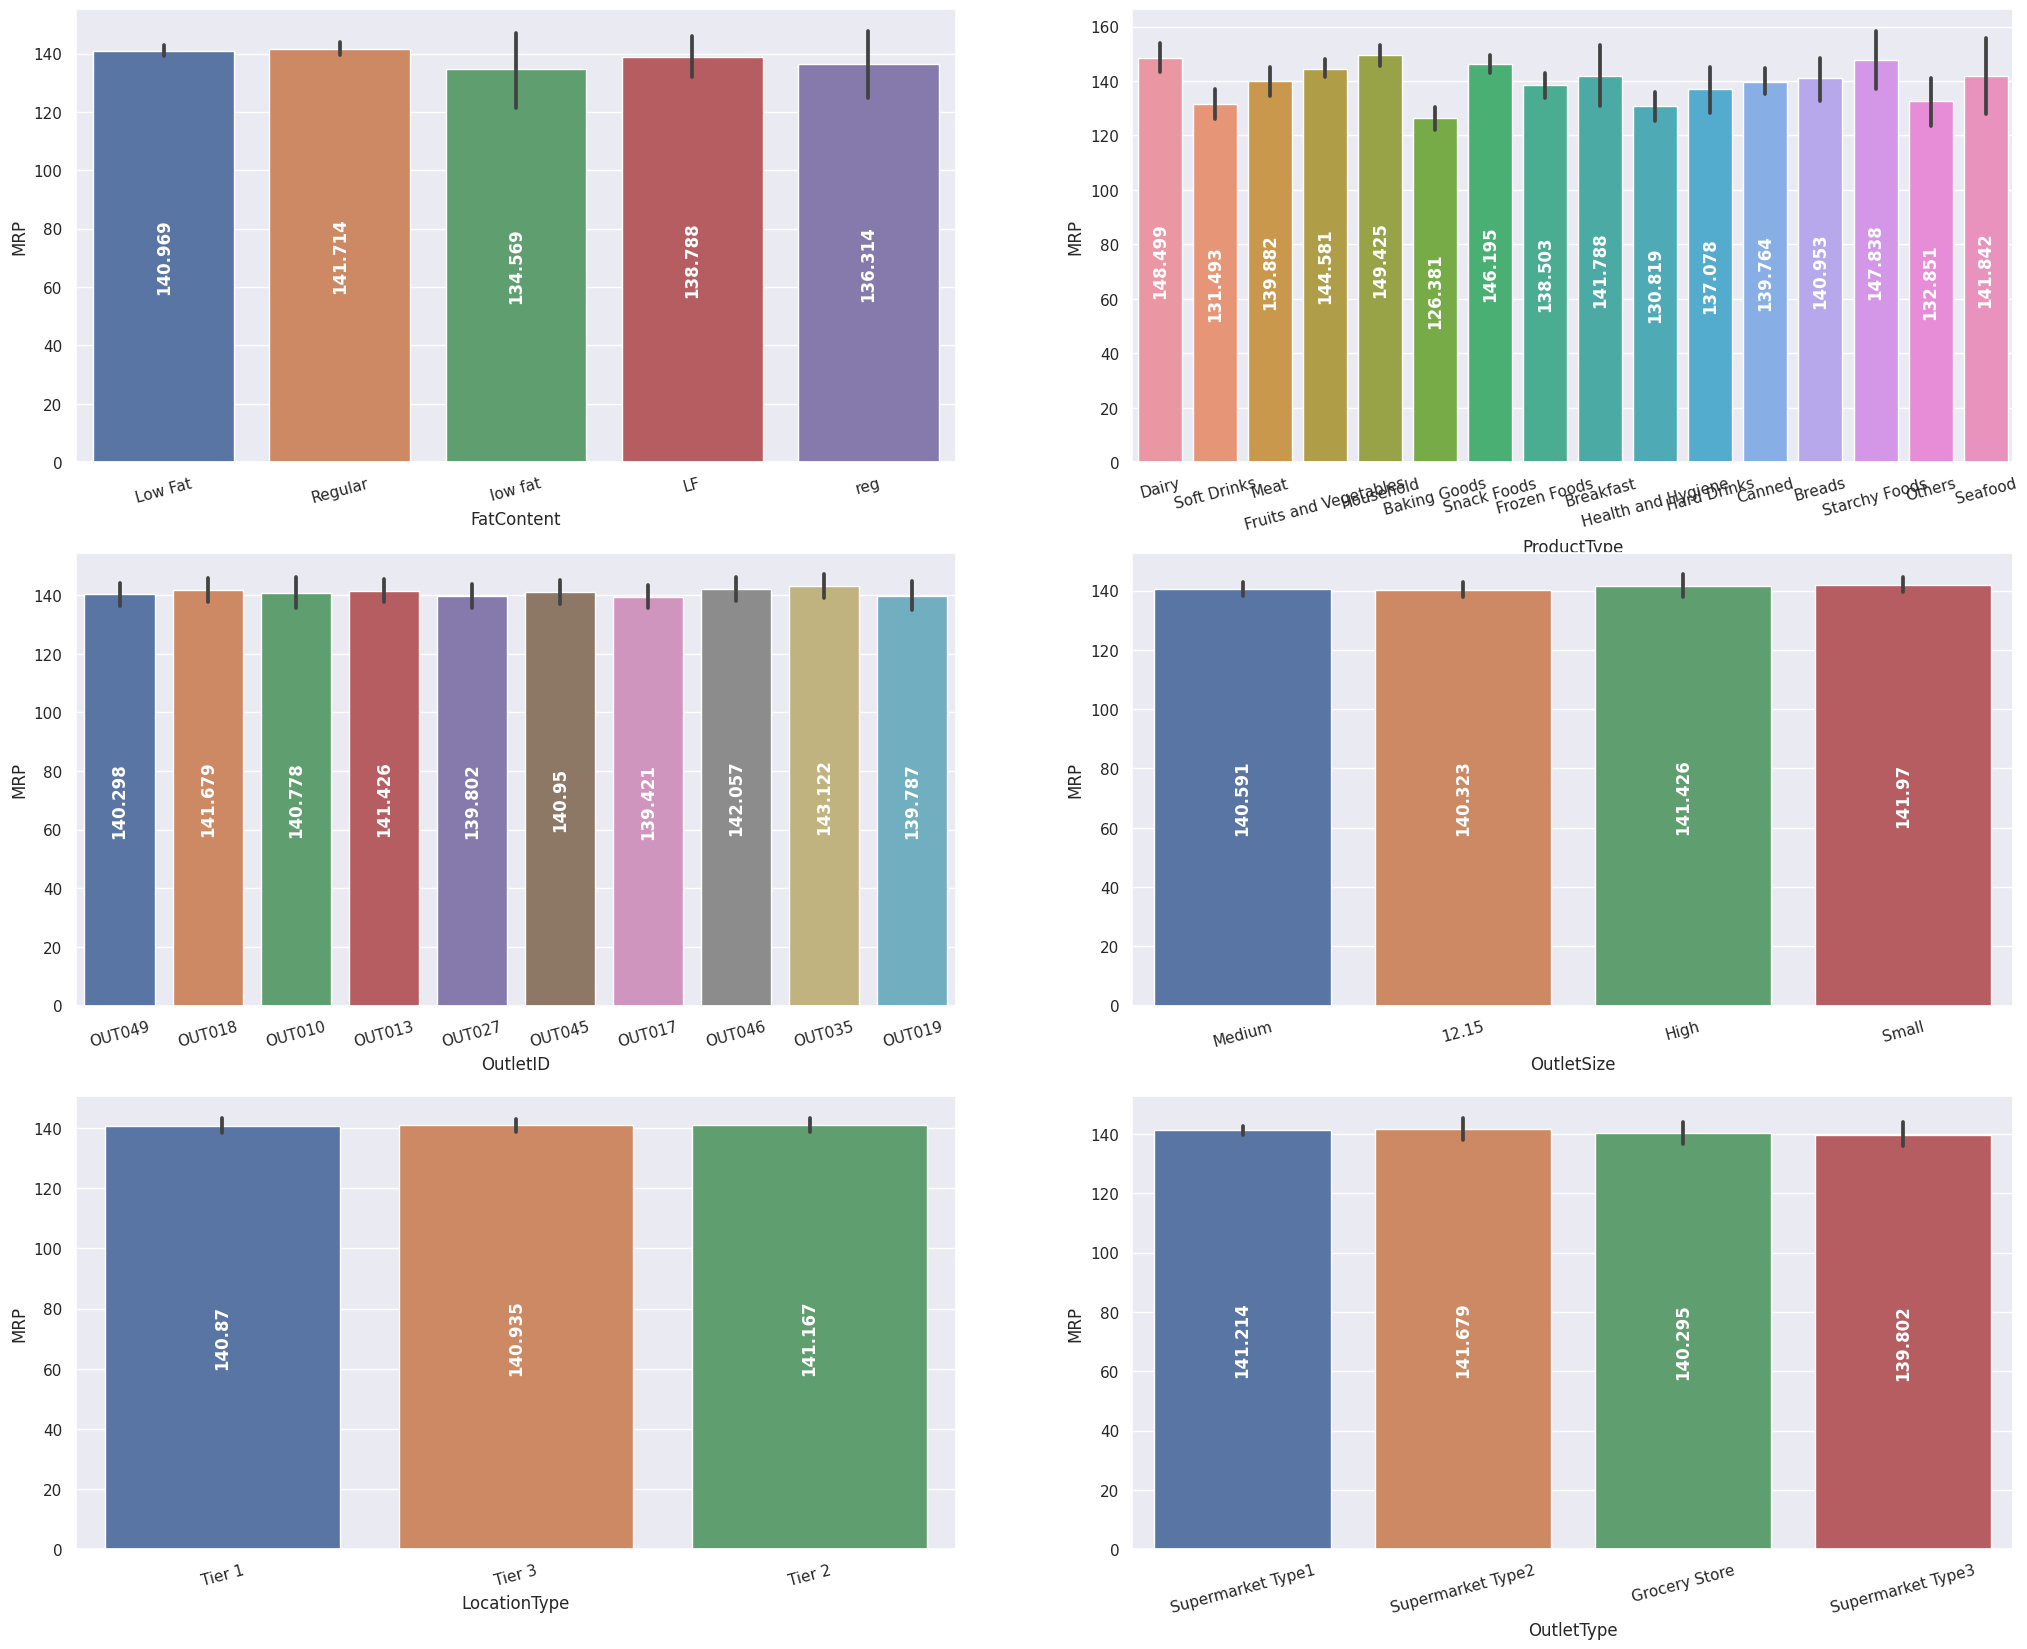

In [484]:
fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(25,20))
axs=axs.flatten()
for i,var in enumerate(Cat_Var):
  ax=sns.barplot(x=var,y='MRP',data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=15)
  for container in ax.containers:
    container.datavalues
    ax.bar_label(container,color='white',rotation=90,label_type='center',fontweight='bold')


<function matplotlib.pyplot.show(close=None, block=None)>

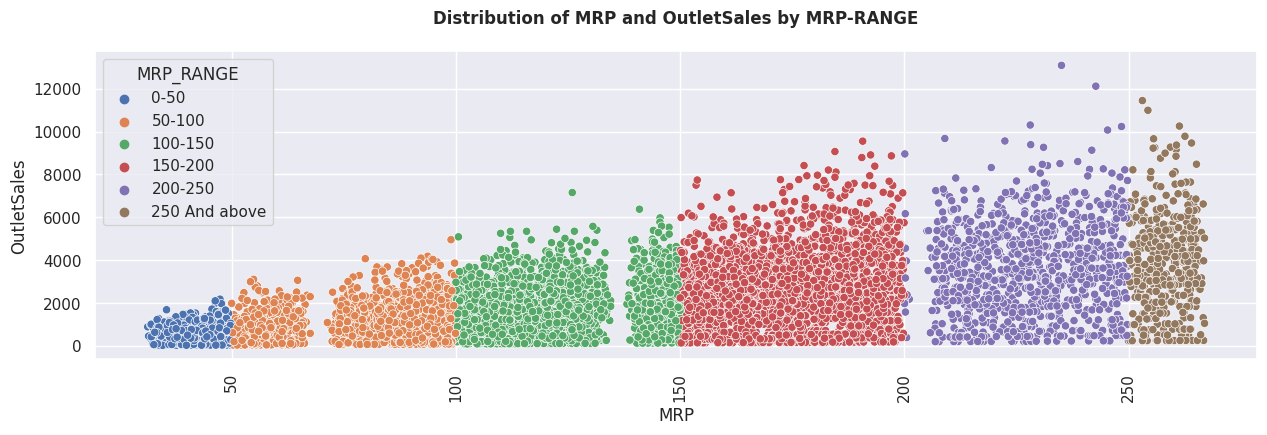

In [457]:
plt.figure(figsize=(15,4))
#sns.scatterplot(data=df, x="OutletSize", y="OutletSales",palette="deep")
sns.scatterplot(data=df,x=df['MRP'],y=df['OutletSales'],palette="deep",hue='MRP_RANGE')
plt.title("Distribution of MRP and OutletSales by MRP-RANGE",weight='bold', pad=20)
plt.xticks(rotation=90)
plt.show

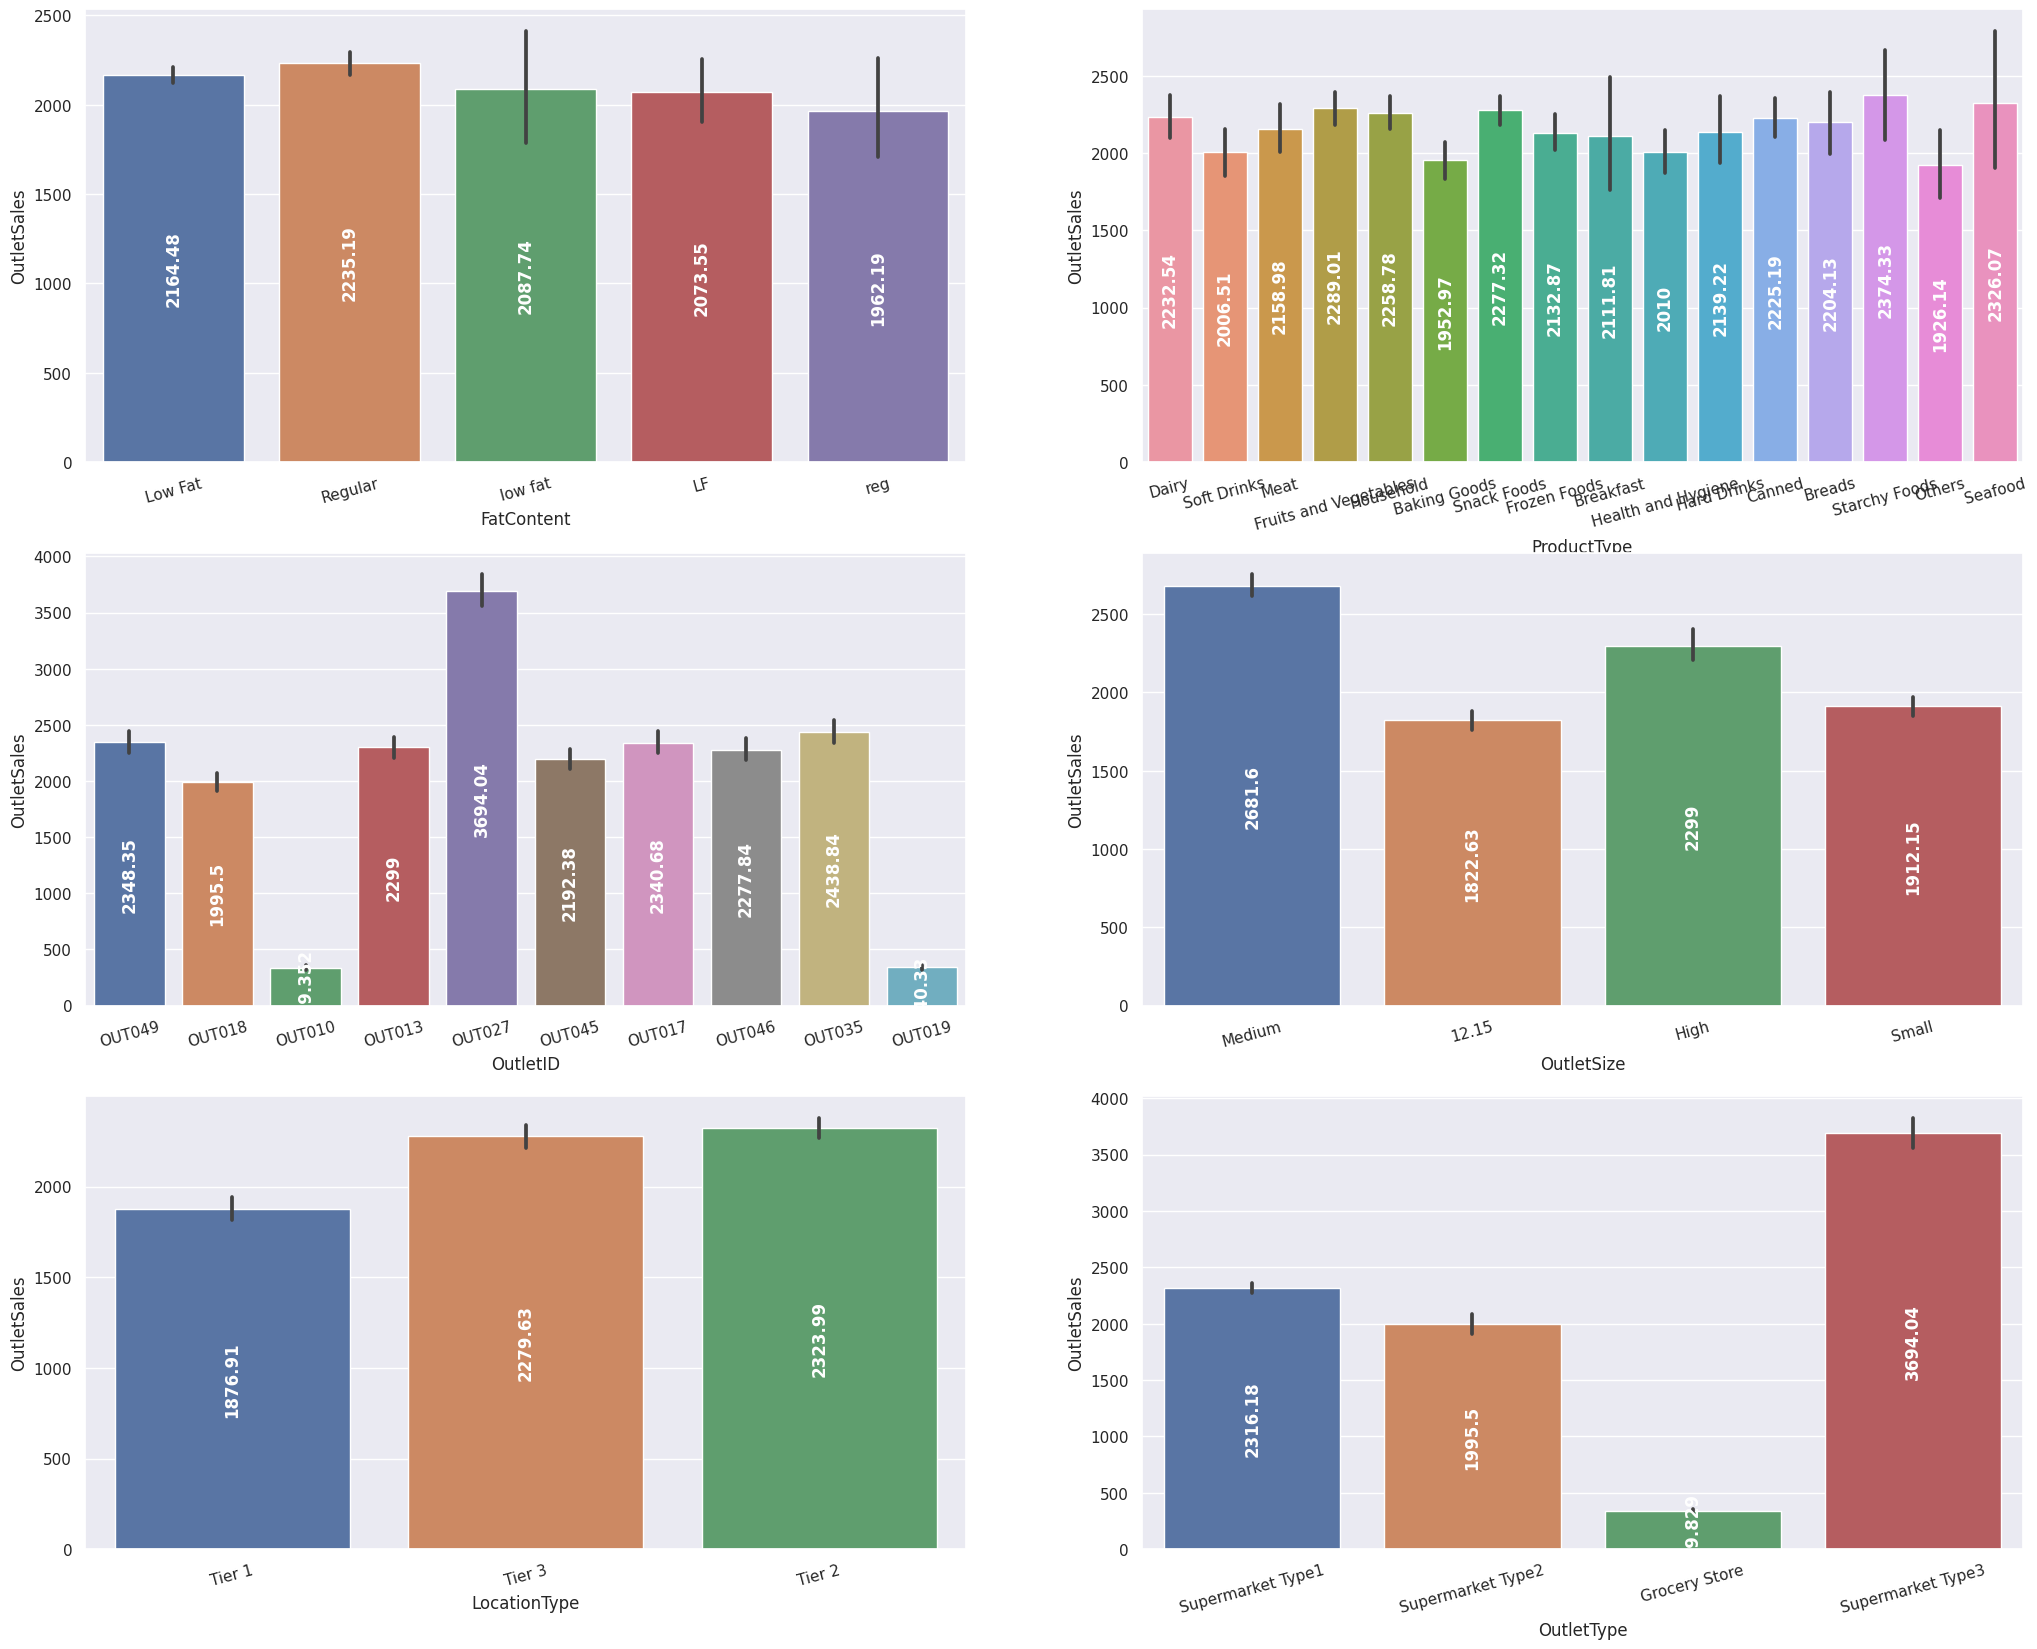

In [485]:
fig,axs=plt.subplots(nrows=3,ncols=2,figsize=(25,20))
axs=axs.flatten()
for i,var in enumerate(Cat_Var):
  ax=sns.barplot(x=var,y='OutletSales',data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=15)
  for container in ax.containers:
    container.datavalues
    ax.bar_label(container,color='white',rotation=90,label_type='center',fontweight='bold')

<function matplotlib.pyplot.show(close=None, block=None)>

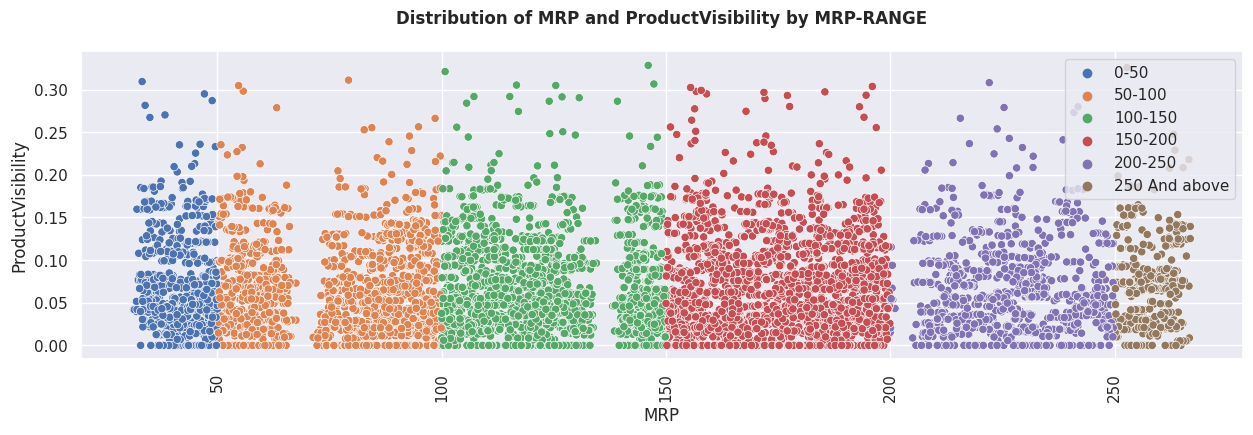

In [492]:
plt.figure(figsize=(15,4))
#sns.scatterplot(data=df, x="OutletSize", y="OutletSales",palette="deep")
sns.scatterplot(data=df,x=df['MRP'],y=df['ProductVisibility'],palette="deep",hue='MRP_RANGE')
plt.xticks(rotation=90)
plt.title("Distribution of MRP and ProductVisibility by MRP-RANGE",weight='bold', pad=20)
plt.legend(loc=1)
plt.show

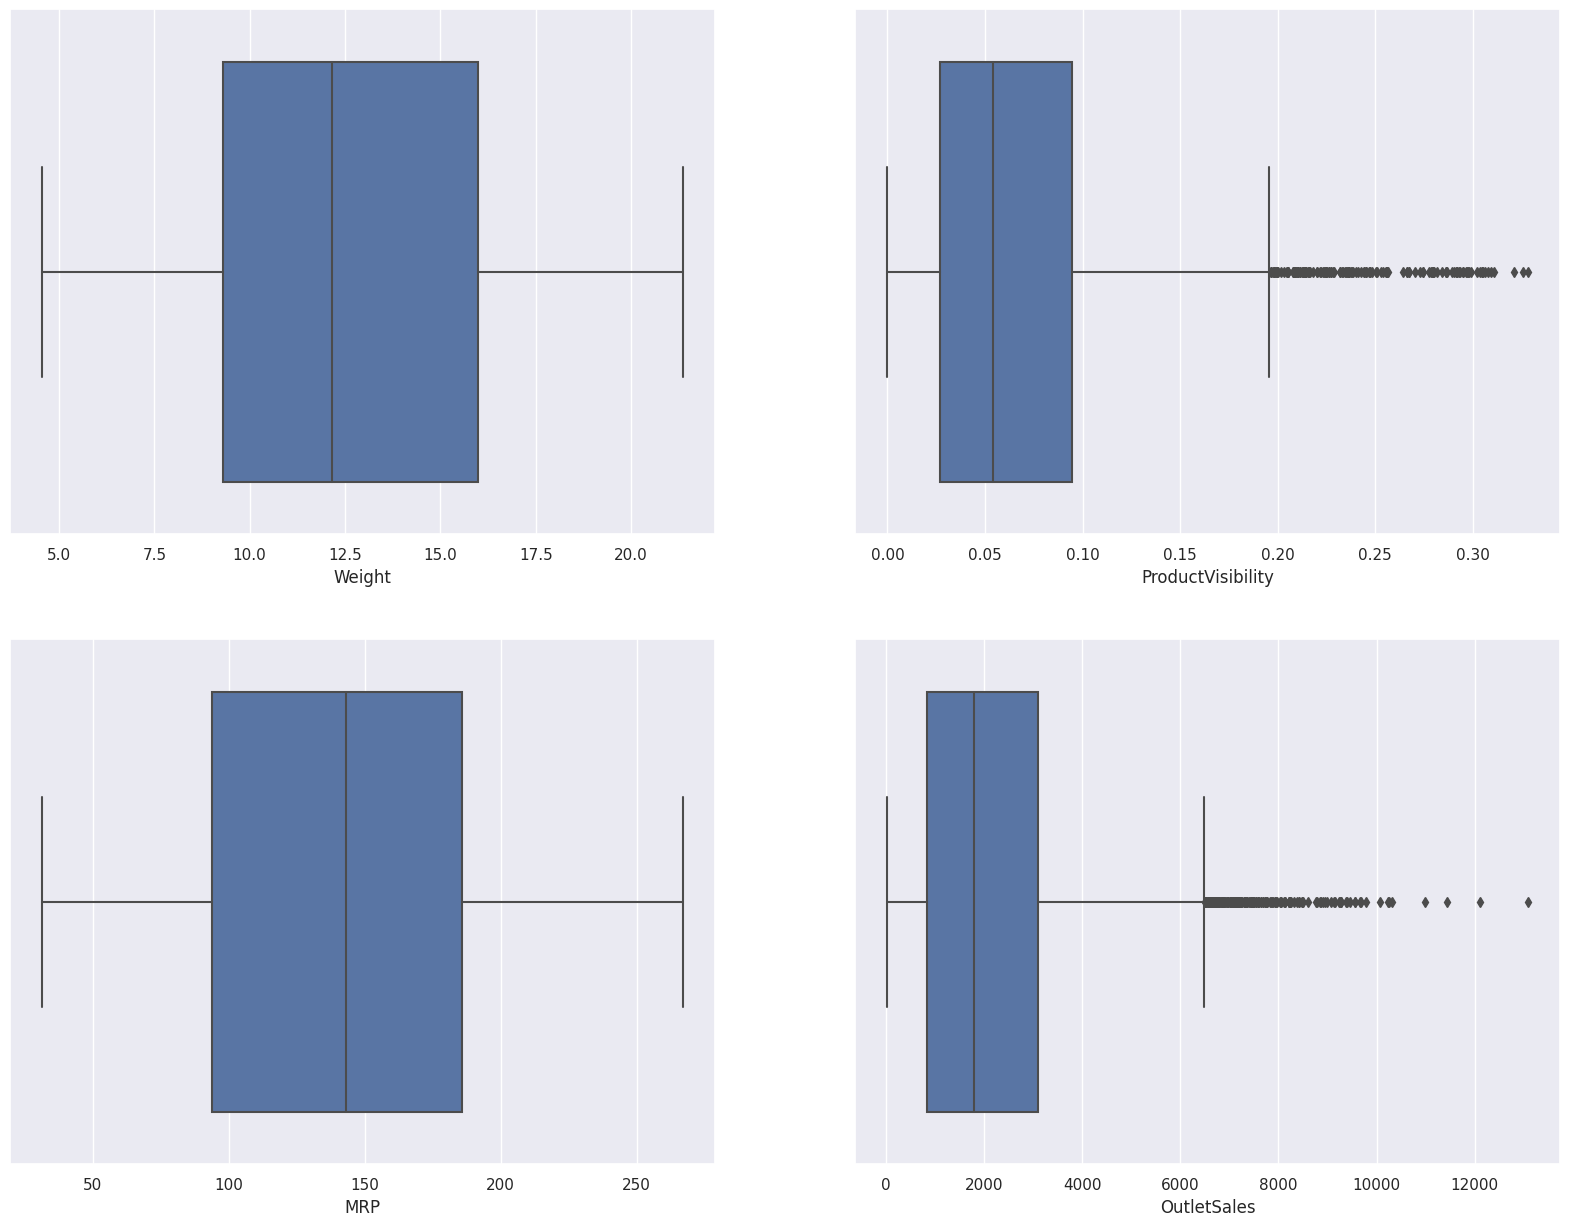

In [486]:
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(20,15))
axs=axs.ravel()
for i,var in enumerate(num_cols):
  ax=sns.boxplot(data=df,x=var,ax=axs[i])


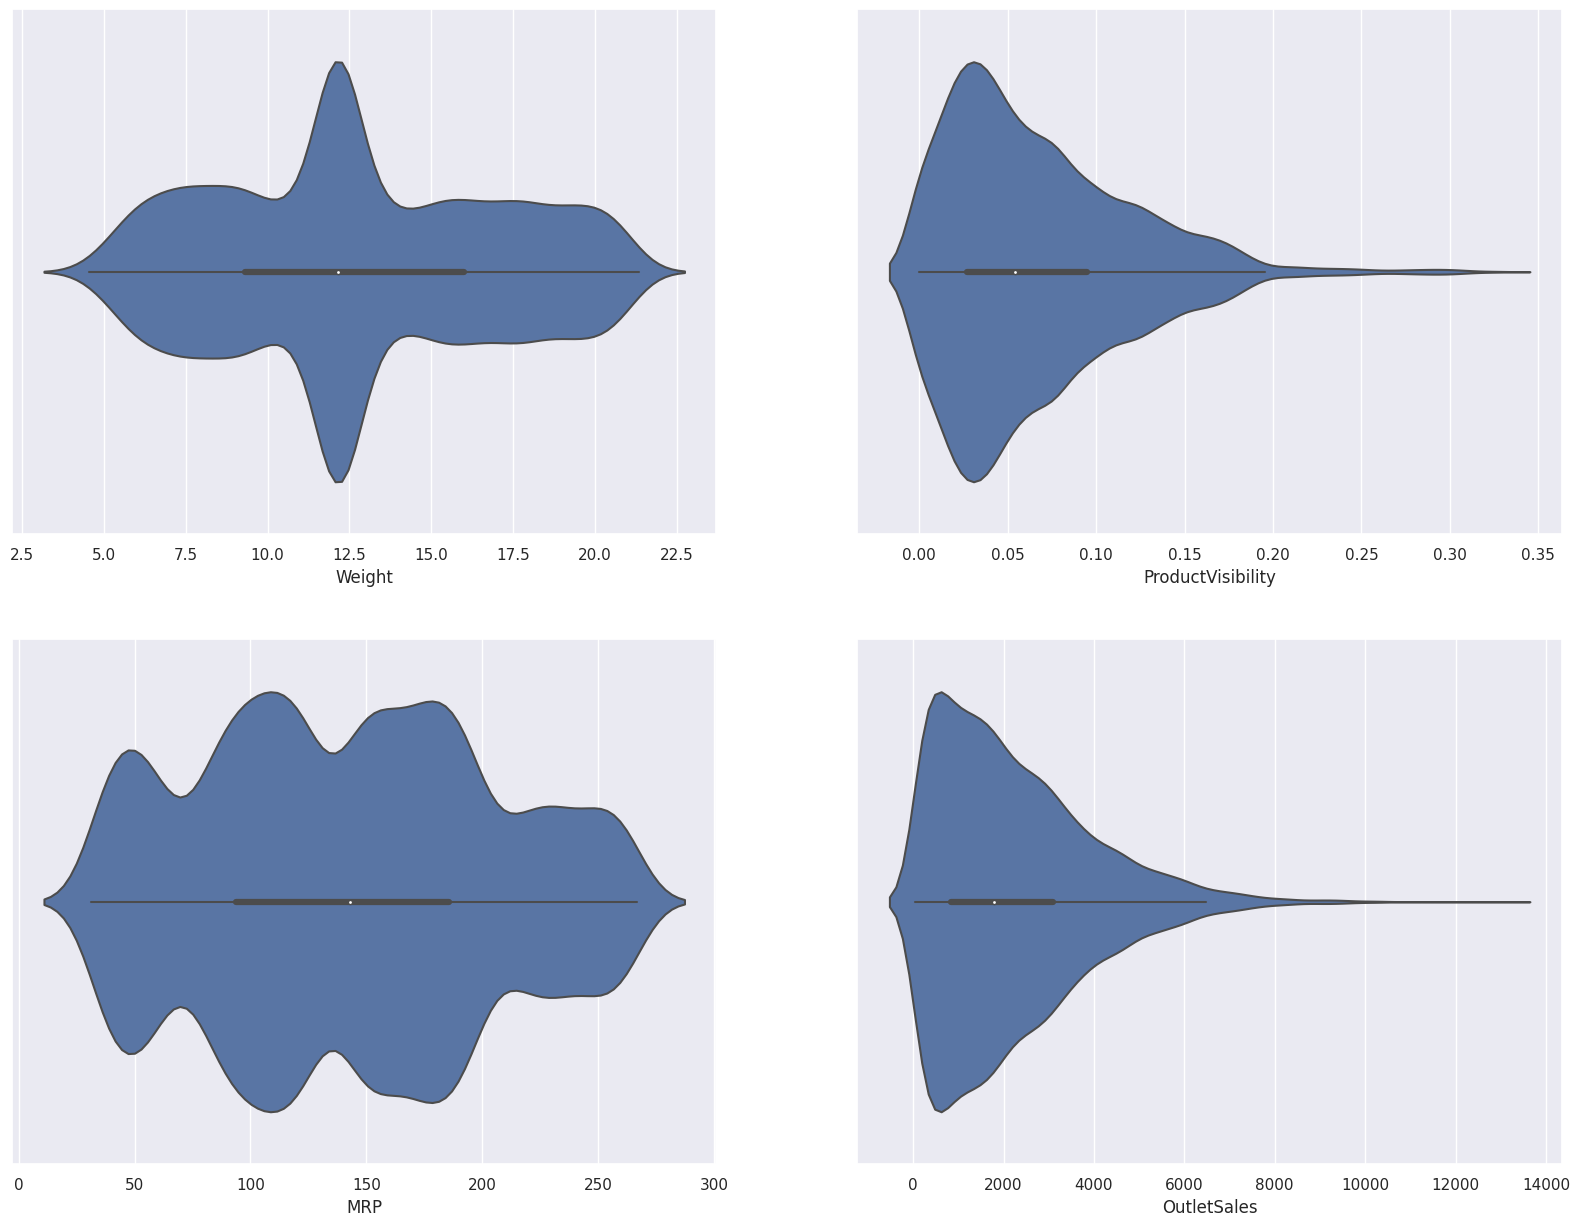

In [461]:
fig,axs=plt.subplots(ncols=2,nrows=2,figsize=(20,15))
axs=axs.ravel()
for i,var in enumerate(num_cols):
  sns.violinplot(data=df,x=var,ax=axs[i])

<function matplotlib.pyplot.show(close=None, block=None)>

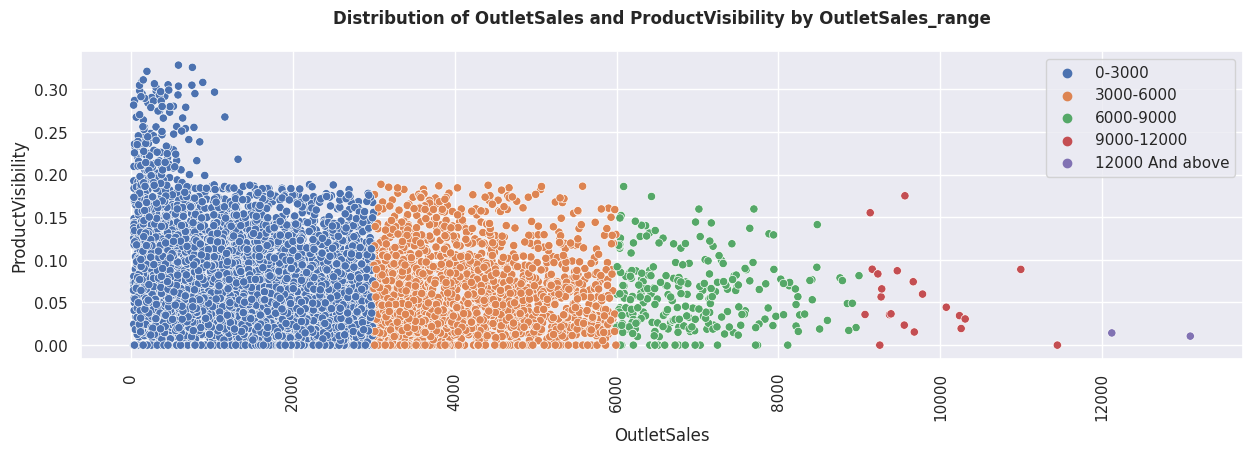

In [473]:
plt.figure(figsize=(15,4))
#sns.scatterplot(data=df, x="OutletSize", y="OutletSales",palette="deep")
sns.scatterplot(data=df,x=df['OutletSales'],y=df['ProductVisibility'],palette="deep",hue='OutletSales_range')
plt.xticks(rotation=90)
plt.title("Distribution of OutletSales and ProductVisibility by OutletSales_range",weight='bold', pad=20)
plt.legend(loc=1)
plt.show

In [472]:
cat_var_b

['MRP_RANGE', 'OutletSales_range']

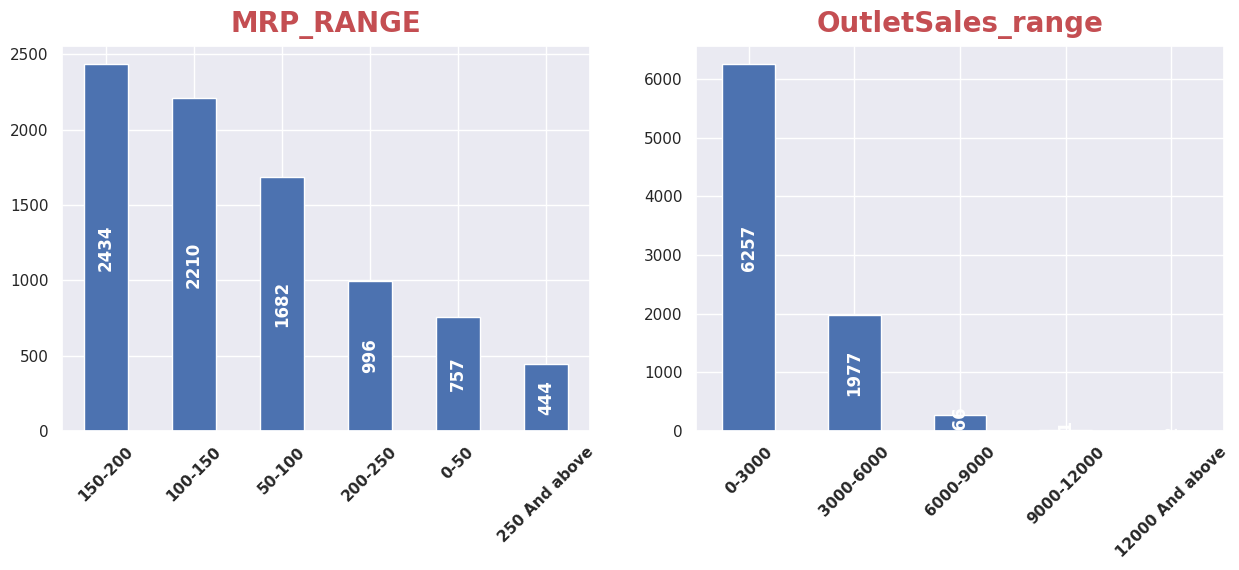

In [471]:
cat_var_b=list(df.describe(include='category').T.index)
fig,axs=plt.subplots(nrows=1,ncols=2,figsize=(15,5))
axs=axs.flatten()
for i,var in enumerate(cat_var_b):
  #plt.title(f"{var} wise distribution",loc='center',pad=10)
  ax=df[f'{var}'].value_counts().plot(kind='bar',ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),fontweight='bold',rotation=45)
  axs[i].set_title(f"{var}",pad=10,fontweight='bold',fontsize=20,color='r')
  for container in ax.containers:
    container.datavalues
    ax.bar_label(container,color='white',rotation=90,label_type='center',fontweight='bold')

<function matplotlib.pyplot.show(close=None, block=None)>

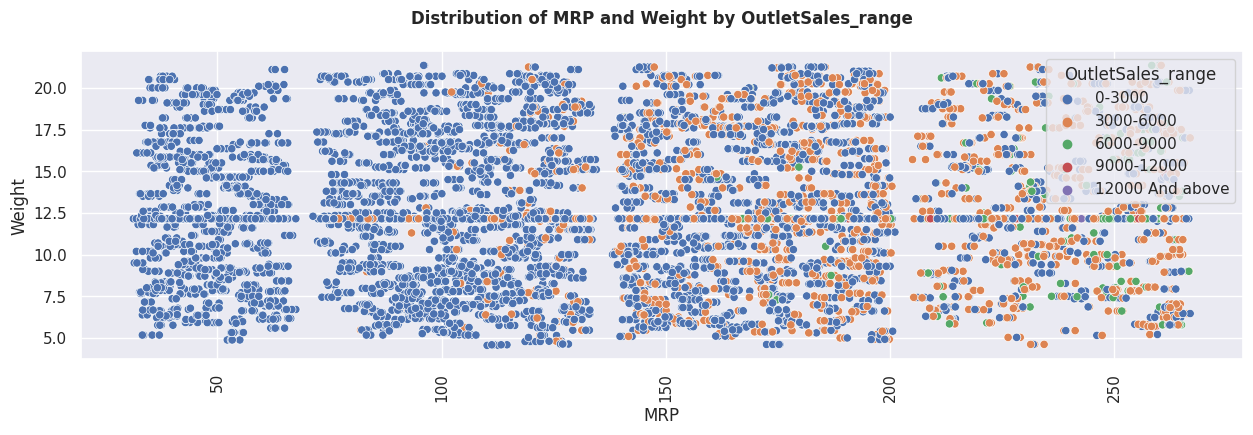

In [479]:
plt.figure(figsize=(15,4))
#sns.scatterplot(data=df, x="OutletSize", y="OutletSales",palette="deep")
sns.scatterplot(data=df,x=df['MRP'],y=df['Weight'],palette="deep",hue='OutletSales_range')
plt.title("Distribution of MRP and Weight by OutletSales_range",weight='bold', pad=20)
plt.xticks(rotation=90)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

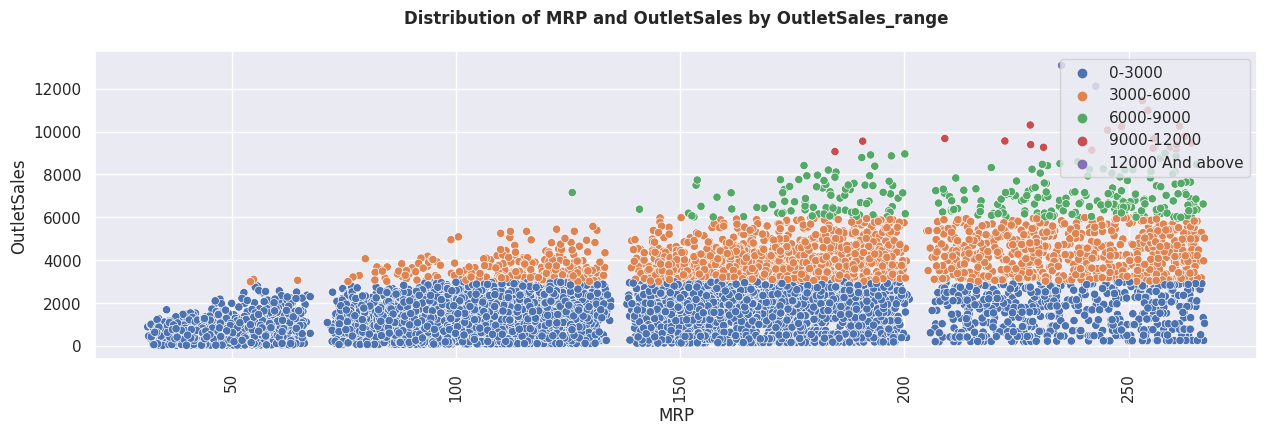

In [480]:
plt.figure(figsize=(15,4))
#sns.scatterplot(data=df, x="OutletSize", y="OutletSales",palette="deep")
sns.scatterplot(data=df,x=df['MRP'],y=df['OutletSales'],palette="deep",hue='OutletSales_range')
plt.xticks(rotation=90)
plt.title("Distribution of MRP and OutletSales by OutletSales_range",weight='bold', pad=20)
plt.legend(loc=1)
plt.show